***
LIBRARIES: most required ones
***

In [52]:
from tqdm import tqdm # progress bar
import matplotlib.pyplot as plt # plot


import torch # pytorch
import torch.nn as nn # neural network
import torch.optim as optim # optimizer
from torchsummary import summary # model summary (architecture)
from torch.utils.data import DataLoader, random_split # dataloader, dataset split
from torchvision import transforms,datasets # image processing, datasets
import torchvision.models as models # pretrained models
import torchvision
import numpy as np
import pandas as pd



In [ ]:
# pip install torchsummary

In [41]:
DATA_PATH = './data/datasets/'

***
DATA LOADING
***

In [42]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

In [44]:
dataset = datasets.ImageFolder('./data/dataset/', transform=data_transforms['validation'])


In [45]:
train_size = int(0.7 * 1500)
test_size = 1500 - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [46]:
train_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [48]:
classes = ('cloudy','foggy','rainy','shine','sunrise')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


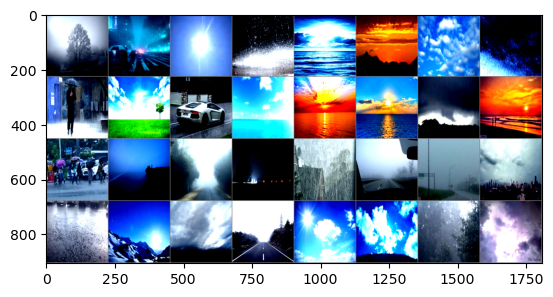

foggy foggy shine rainy shine sunrise cloudy rainy rainy shine rainy shine sunrise sunrise cloudy sunrise rainy foggy foggy foggy rainy foggy foggy cloudy rainy shine cloudy foggy shine shine rainy cloudy


In [53]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

***
ARCHITECTURE DEFINING
***

In [121]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(44944 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [108]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [111]:
# torch.flatten(net.conv2(net.pool(net.conv1(torch.rand([3,224,224,])))),1).shape
net(torch.rand([3,224,224,]))

torch.Size([16, 53, 53])


tensor([[ 8.3627e-02,  1.9594e-02,  5.0458e-02,  1.1662e-01, -8.3037e-03],
        [ 8.6186e-02,  1.7929e-02,  3.4305e-02,  1.1871e-01, -5.0748e-03],
        [ 8.9344e-02,  1.0624e-02,  1.9855e-02,  1.1486e-01, -1.3080e-03],
        [ 8.3627e-02,  1.9594e-02,  5.0458e-02,  1.1662e-01, -8.3037e-03],
        [ 8.1370e-02,  6.0459e-03,  1.5280e-02,  1.1748e-01, -1.9064e-03],
        [ 8.1913e-02, -6.0480e-03,  7.3824e-04,  1.0917e-01,  3.7687e-03],
        [ 8.1098e-02, -6.7891e-03, -1.9974e-02,  1.1567e-01,  5.7120e-03],
        [ 8.3627e-02,  1.9594e-02,  5.0458e-02,  1.1662e-01, -8.3037e-03],
        [ 9.0378e-02, -3.9043e-02, -5.1787e-02,  1.2168e-01,  1.3130e-02],
        [ 8.2319e-02,  1.9515e-02,  4.8676e-02,  1.1714e-01, -7.3733e-03],
        [ 8.2679e-02, -4.6677e-02, -5.5914e-02,  1.1886e-01,  1.1800e-02],
        [ 8.3627e-02,  1.9594e-02,  5.0458e-02,  1.1662e-01, -8.3037e-03],
        [ 8.0236e-02, -9.8571e-03, -1.2961e-03,  1.0921e-01, -9.9910e-05],
        [ 8.5283e-02,  1.

test_________________________

test________________

***
OBJECTS: CRITERION, OPTIMIZER, SCHEDULER(maybe)
***

In [122]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

***
TRAINING AND VALIDATION: Validation not neccessary but recommended
***

In [123]:
loss_arr = []
acc_arr = []
n_epochs = 12
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass 
        outputs = net(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # print statistics
        running_loss += loss.item()
        loss_arr.append(running_loss)

        running_loss = 0.0
        
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_arr.append(100* correct/total)


    print('Epoch %d: Accuracy: %d %%' % (epoch,(100 * correct / total)))

Epoch 0: Accuracy: 23 %
Epoch 1: Accuracy: 41 %
Epoch 2: Accuracy: 33 %
Epoch 3: Accuracy: 56 %
Epoch 4: Accuracy: 63 %
Epoch 5: Accuracy: 66 %
Epoch 6: Accuracy: 68 %
Epoch 7: Accuracy: 70 %
Epoch 8: Accuracy: 68 %
Epoch 9: Accuracy: 72 %
Epoch 10: Accuracy: 74 %
Epoch 11: Accuracy: 74 %


In [117]:
for epoch in range(6):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print("inputs: ", inputs)
        # print("labels: ",labels )

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss:.3f}')
        running_loss = 0.0

        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Epoch %d: Accuracy: %d %%' % (epoch,(100 * correct / total)))

print('Finished Training')

torch.Size([32, 16, 53, 53])
[1,     1] loss: 1.545
torch.Size([32, 16, 53, 53])
[1,     2] loss: 1.519
torch.Size([32, 16, 53, 53])
[1,     3] loss: 1.498
torch.Size([32, 16, 53, 53])
[1,     4] loss: 1.509
torch.Size([32, 16, 53, 53])
[1,     5] loss: 1.457
torch.Size([32, 16, 53, 53])
[1,     6] loss: 1.504
torch.Size([32, 16, 53, 53])
[1,     7] loss: 1.464
torch.Size([32, 16, 53, 53])
[1,     8] loss: 1.504
torch.Size([32, 16, 53, 53])
[1,     9] loss: 1.453
torch.Size([32, 16, 53, 53])
[1,    10] loss: 1.354
torch.Size([32, 16, 53, 53])
[1,    11] loss: 1.581
torch.Size([32, 16, 53, 53])
[1,    12] loss: 1.407
torch.Size([32, 16, 53, 53])
[1,    13] loss: 1.279
torch.Size([32, 16, 53, 53])
[1,    14] loss: 1.473
torch.Size([2, 16, 53, 53])
[1,    15] loss: 1.291
torch.Size([32, 16, 53, 53])
[2,     1] loss: 1.459
torch.Size([32, 16, 53, 53])
[2,     2] loss: 1.375
torch.Size([32, 16, 53, 53])
[2,     3] loss: 1.338
torch.Size([32, 16, 53, 53])
[2,     4] loss: 1.363
torch.Size([3

***
PLOTTING: Loss & Accuracy
***

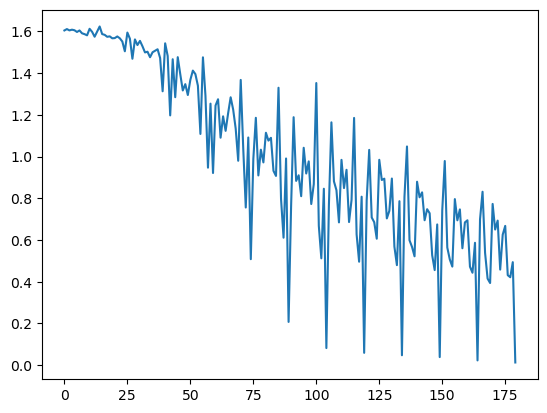

In [129]:
# Methods you may need
plt.figure, plt.subplot, plt.plot, plt.xlabel, plt.ylabel, plt.title, plt.legend, plt.show

# plt.plot(range(len(acc_arr)), acc_arr)
plt.plot(range(len(loss_arr)), loss_arr)

***
SAVING
***

In [131]:
width,height = 224,224
x = torch.Tensor(1, 3, width, height)
with torch.no_grad():
    traced_cell = torch.jit.trace(net, (x))
model_name = "./models/A_AHMED_MOADH.pt" # CHANGE THIS TO YOUR OWN PATH (most improtatnt step)
torch.jit.save(traced_cell, model_name)


# torch.save () this is not allowed because it requires class definition before loading for the 
# model evaluation